## Importar Librerías Necesarias

```markdown
Se importan las librerías y funciones necesarias para la implementación de las distintas tareas a realizar durante el proyecto de análisis
```

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [145]:
project_dataframe = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(project_dataframe.head())
print(project_dataframe.info())
print(project_dataframe.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [146]:
numeric_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

project_dataframe[numeric_variables] = project_dataframe[numeric_variables].fillna(project_dataframe[numeric_variables].median())

nominal_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

project_dataframe[nominal_variables] = project_dataframe[nominal_variables].fillna(project_dataframe[nominal_variables].mode().iloc[0])

In [147]:
label_encoders = {}

# nominal_variables.append('NObeyesdad')

for columns in nominal_variables:
   label_encoder = LabelEncoder()
   project_dataframe[columns] = label_encoder.fit_transform(project_dataframe[columns])  # Transformar la columna en numérica
   label_encoders[columns] = label_encoder

print(project_dataframe.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3        Normal_Weight  
1  3.0     2      1   3.0    1  3.0  0.0     2       3        Normal_Weight  
2  3.0     2      0   2.0    0  2.0  1.0     1       3        Normal_Weight  
3  3.0     2      0   2.0    0  2.0  0.0     1       4   Overweight_Level_I  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  Overweight_Level_II  


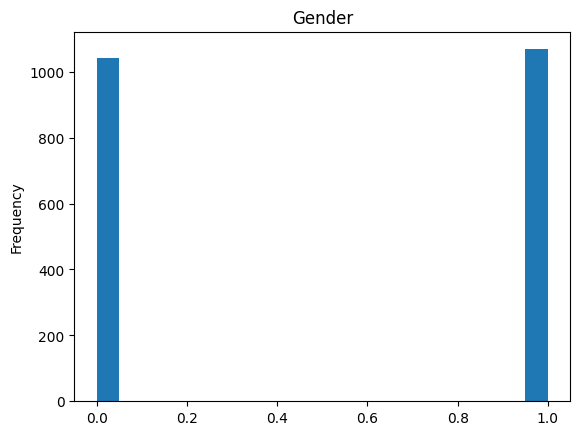

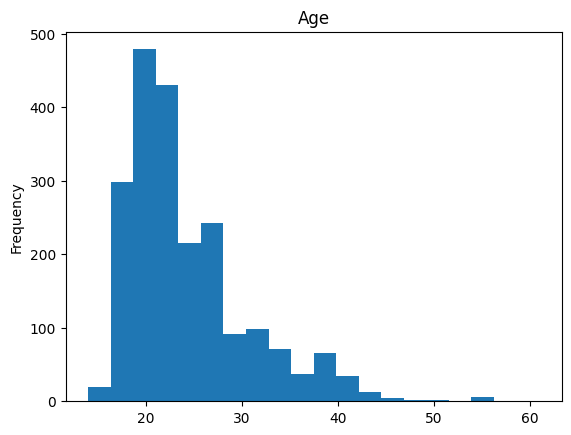

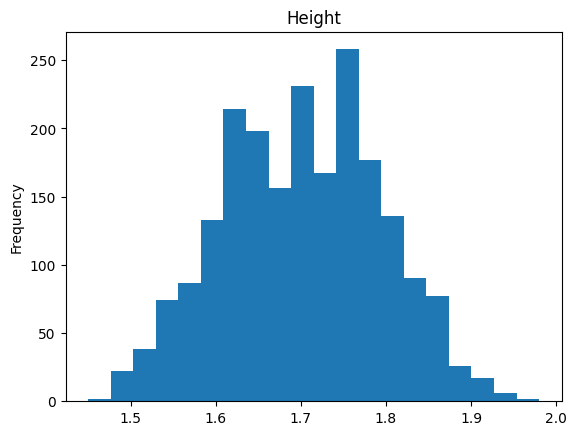

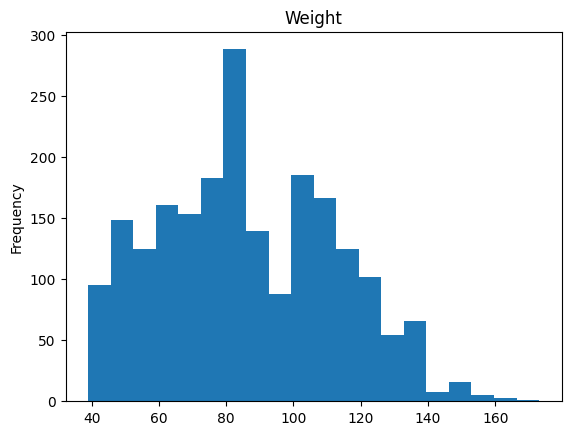

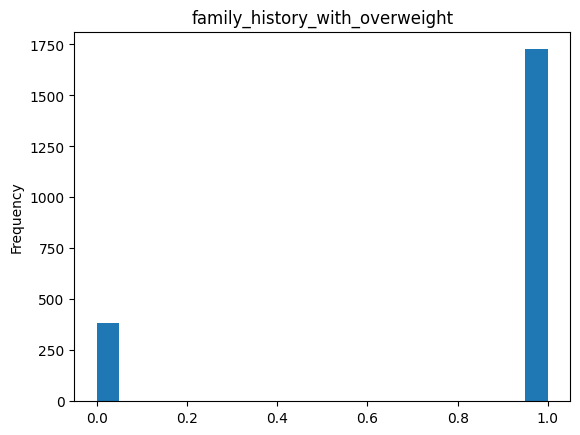

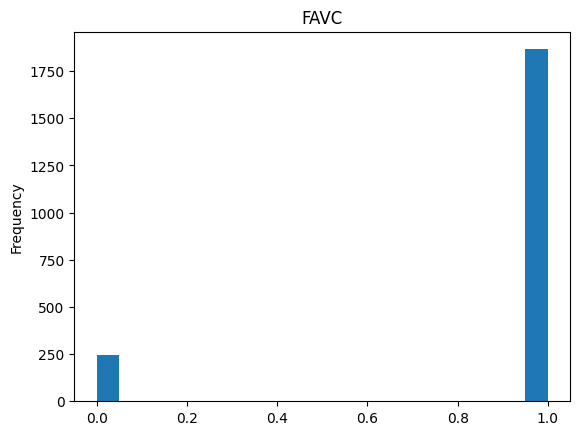

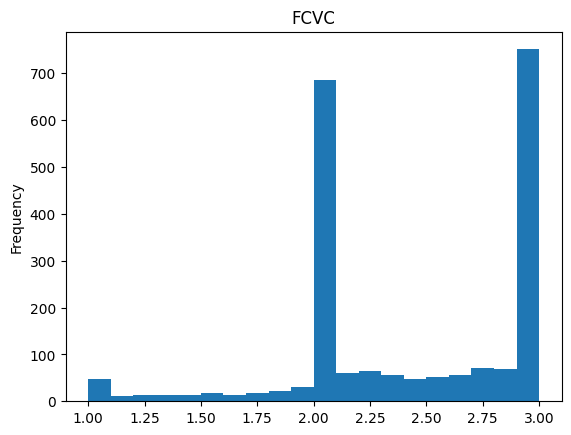

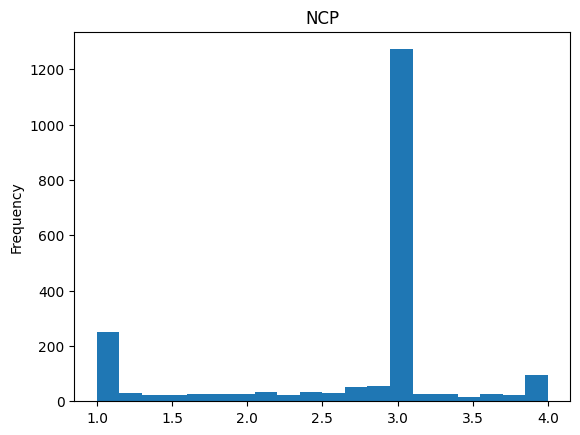

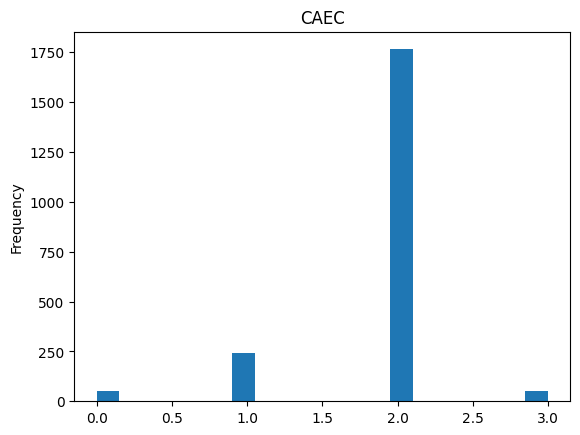

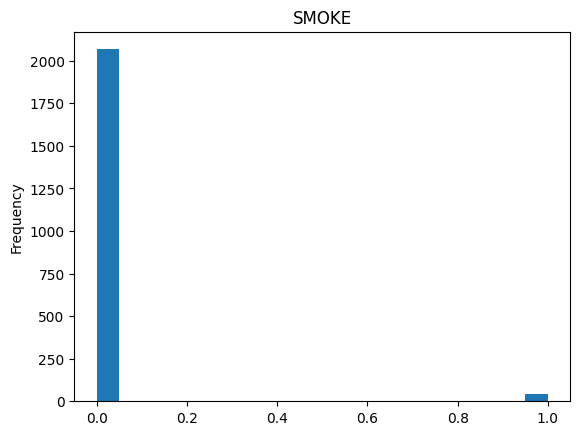

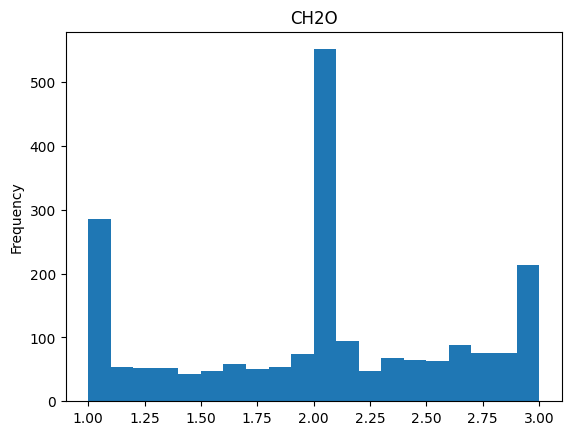

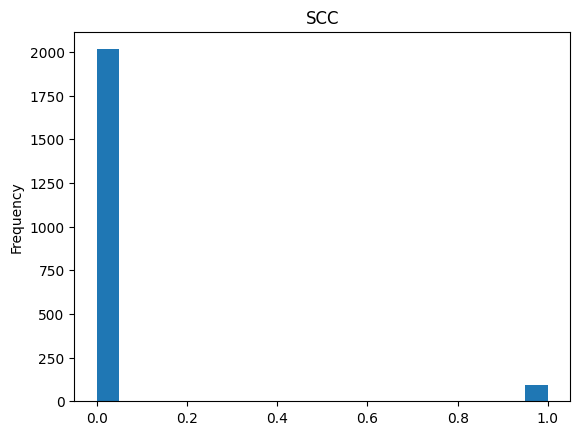

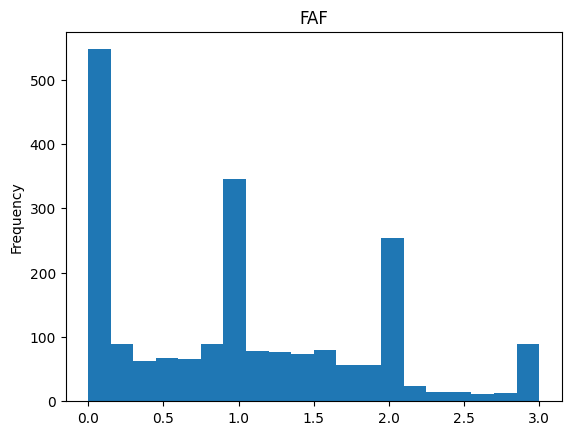

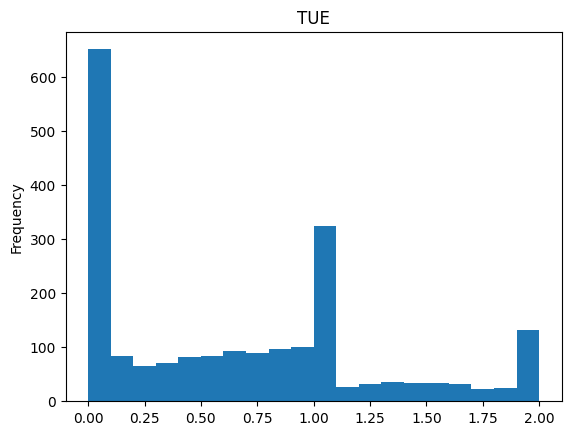

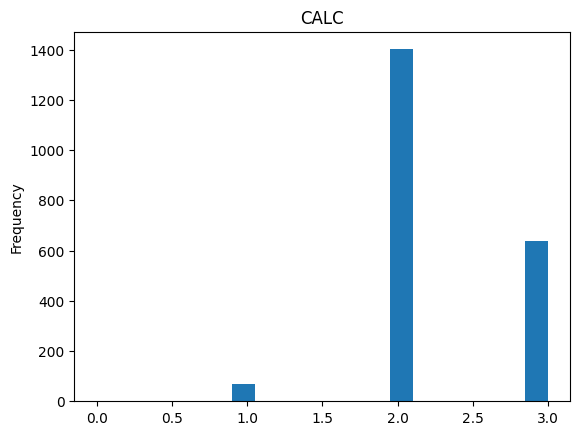

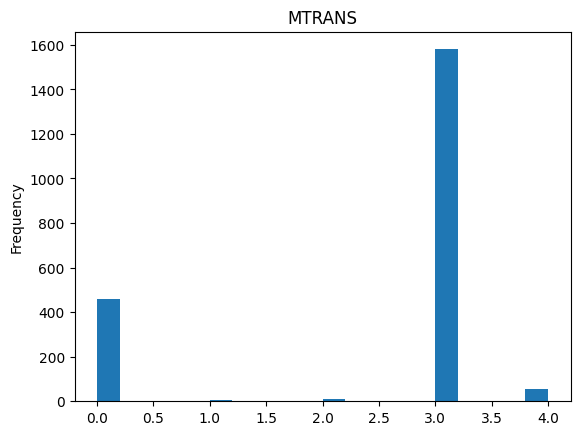

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

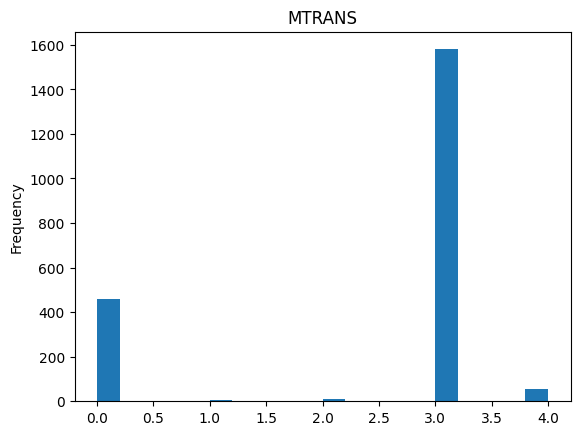

In [148]:
for column in project_dataframe.select_dtypes(include=['number']):
    plt.figure()
    project_dataframe[column].plot(kind='hist', bins=20, title=column)
    plt.show()

print(project_dataframe.info())
print('\n')
print(project_dataframe.describe())

# label_encoders = {}

# nominal_variables = 'NObeyesdad'

# for columns in nominal_variables:
#     label_encoder = LabelEncoder()
#     project_dataframe[columns] = label_encoder.fit_transform(project_dataframe[columns])  # Transformar la columna en numérica
#     label_encoders[columns] = label_encoder

plt.figure()
project_dataframe[column].plot(kind='hist', bins=20, title=column)
plt.show()


Quitar outliners. Al comprobar los outliners encontramos que no hay nada importante que objetar, por lo que lo dejamos tal cual.

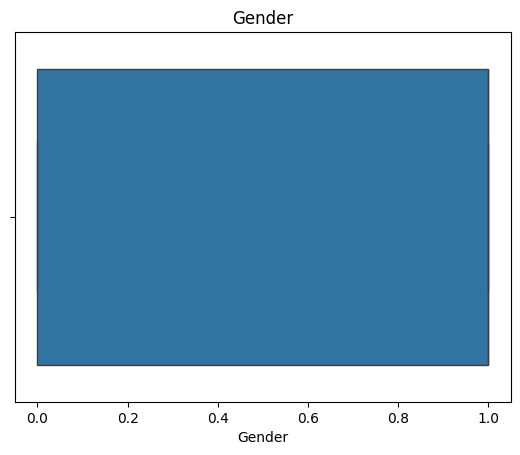

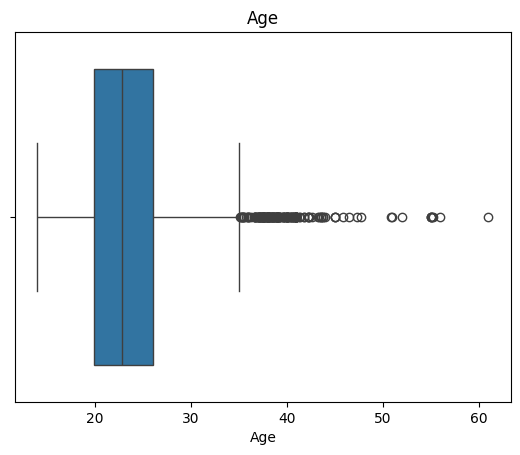

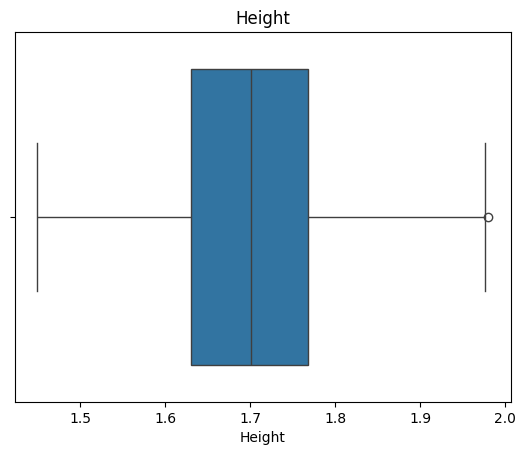

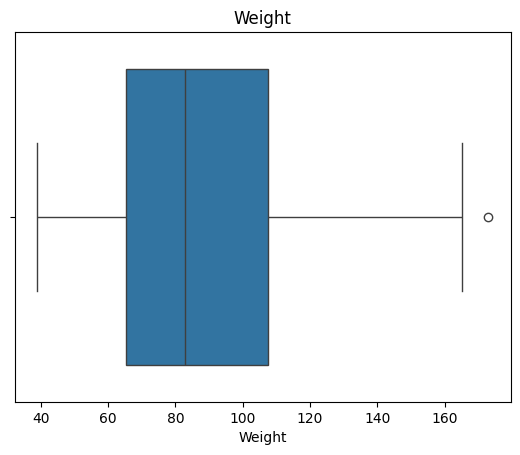

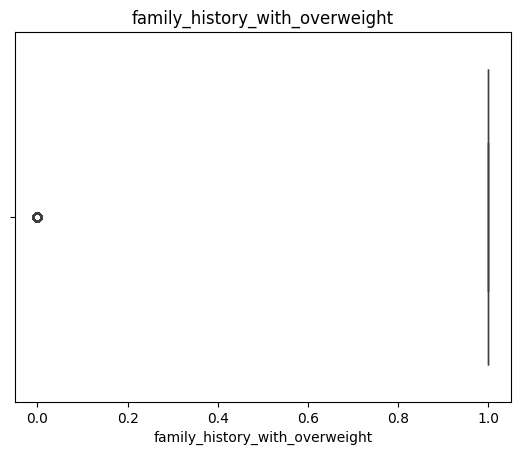

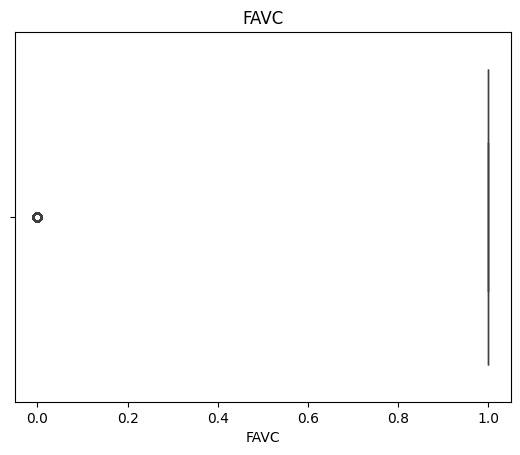

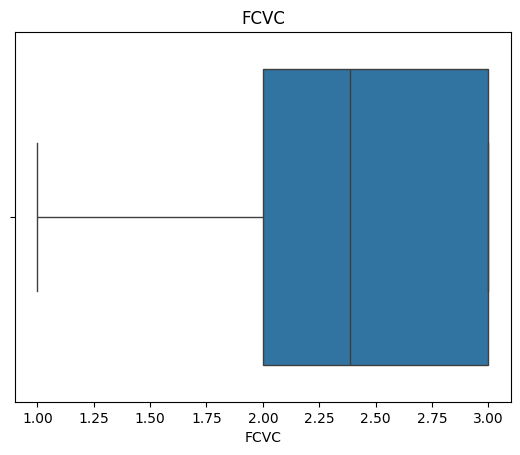

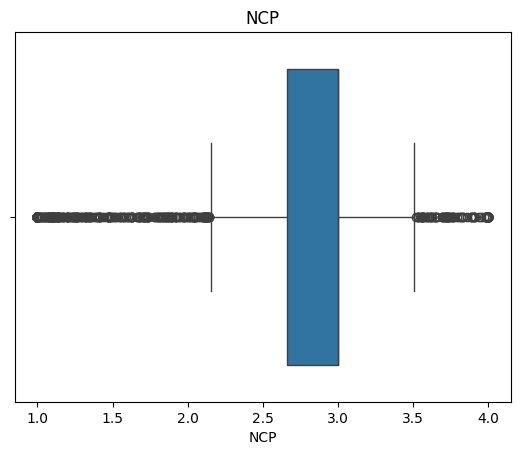

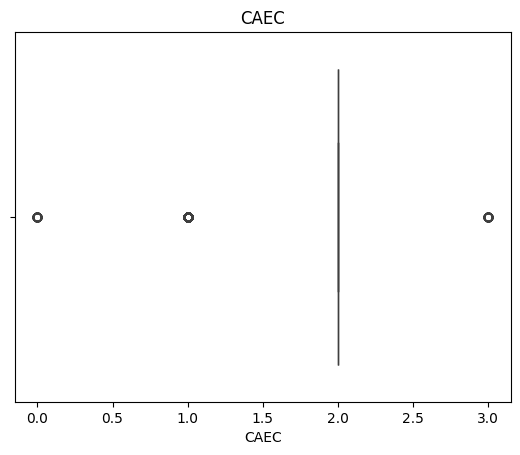

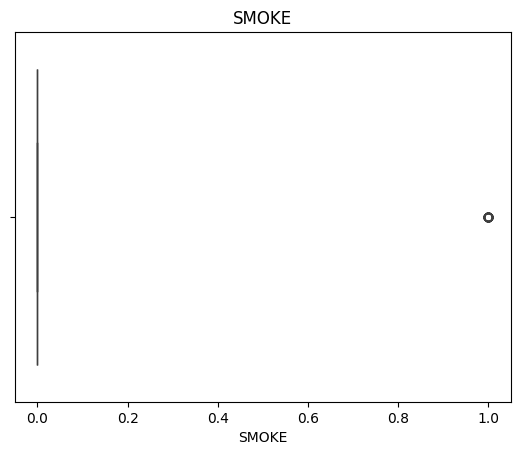

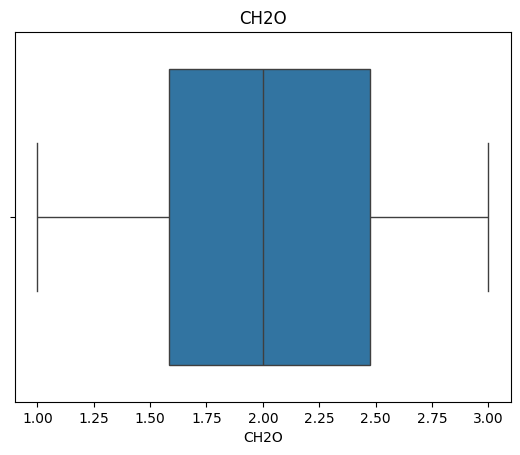

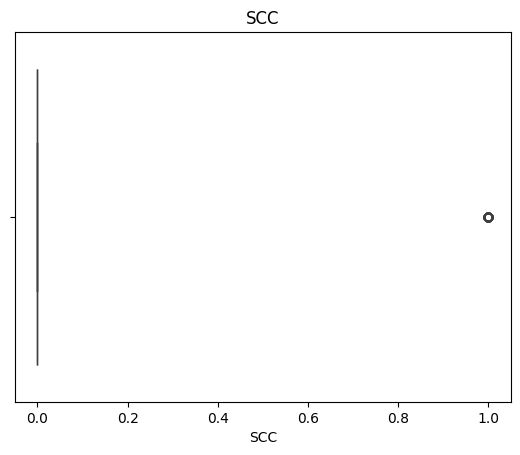

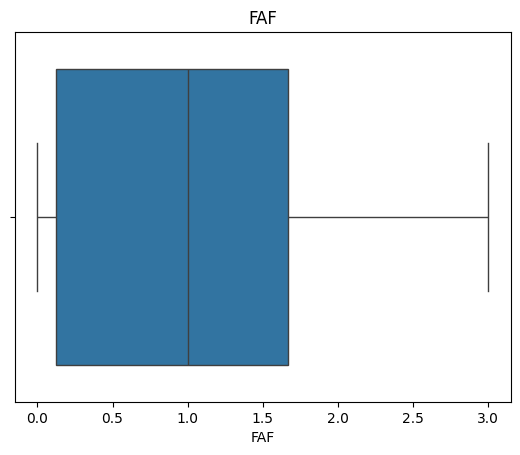

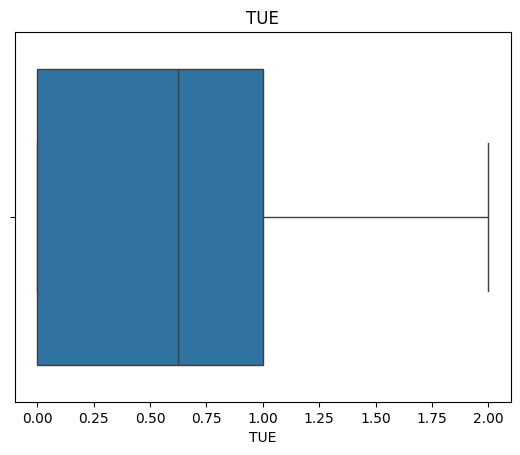

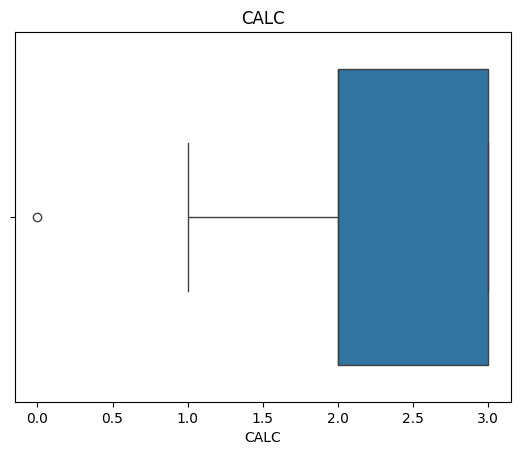

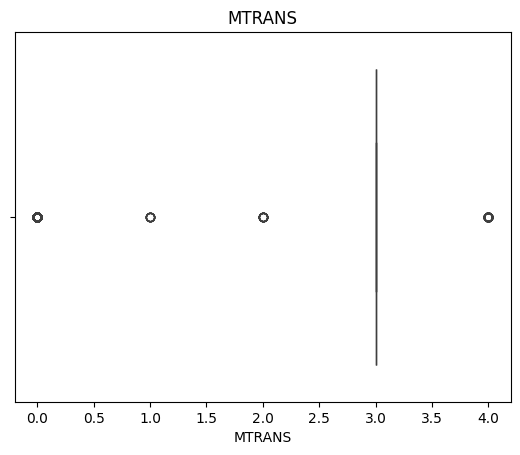

In [149]:
for column in project_dataframe.select_dtypes(include=[np.number]):
    plt.figure()
    sns.boxplot(x=project_dataframe[column])
    plt.title(column)
    plt.show()

## Gestion de los valores nulos

```markdown
Si tras el proceso de transformación de los datos, balanceo y tratamiento de outliers, se encuentra algún valor nulo, al ya ser todas las variables de tipo numérico, rellenamos los valores restantes según la mediana.
```

In [150]:
print(project_dataframe.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


```markdown
Observamos que no existen valores nulos por lo que no es necesario el tratamiento de estos.
```

## Gestionamos la división de las clases en predictoras y objetivo

In [151]:
predict_variables = project_dataframe.drop('NObeyesdad', axis=1)
target_variable = project_dataframe['NObeyesdad']

# División en conjunto de entrenamiento(70%) y prueba(30%)
predict_variables_train, predict_variables_test, target_variable_train, target_variable_test = train_test_split(predict_variables, target_variable, test_size=0.3, random_state=42)

## Gestionamos el desbalanceo de las clases

In [152]:
# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases antes de SMOTE:")
print(target_variable_train.value_counts())

smote = SMOTE()
predict_variables_train, target_variable_train = smote.fit_resample(predict_variables_train, target_variable_train)

# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases después de SMOTE:")
print(target_variable_train.value_counts())

Distribución de clases antes de SMOTE:
NObeyesdad
Obesity_Type_I         249
Obesity_Type_III       226
Overweight_Level_II    211
Obesity_Type_II        209
Overweight_Level_I     202
Normal_Weight          194
Insufficient_Weight    186
Name: count, dtype: int64
Distribución de clases después de SMOTE:
NObeyesdad
Obesity_Type_III       249
Overweight_Level_II    249
Normal_Weight          249
Overweight_Level_I     249
Obesity_Type_II        249
Insufficient_Weight    249
Obesity_Type_I         249
Name: count, dtype: int64


In [153]:
models = {
  "KNN": KNeighborsClassifier(n_neighbors=20),
  "Árbol de Decisión": DecisionTreeClassifier(criterion='entropy', max_depth=12),
  "Naive Bayes": GaussianNB()
}


Modelo: KNN
[[79  7  0  0  0  0  0]
 [23 47  2  0  0 17  4]
 [ 0  0 70  8  5  8 11]
 [ 0  0  3 80  5  0  0]
 [ 0  0  0  3 95  0  0]
 [ 1 11  1  0  0 69  6]
 [ 0  5  9  2  0 12 51]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.92      0.84        86
      Normal_Weight       0.67      0.51      0.58        93
     Obesity_Type_I       0.82      0.69      0.75       102
    Obesity_Type_II       0.86      0.91      0.88        88
   Obesity_Type_III       0.90      0.97      0.94        98
 Overweight_Level_I       0.65      0.78      0.71        88
Overweight_Level_II       0.71      0.65      0.68        79

           accuracy                           0.77       634
          macro avg       0.77      0.77      0.77       634
       weighted avg       0.77      0.77      0.77       634

Accuracy: 0.77


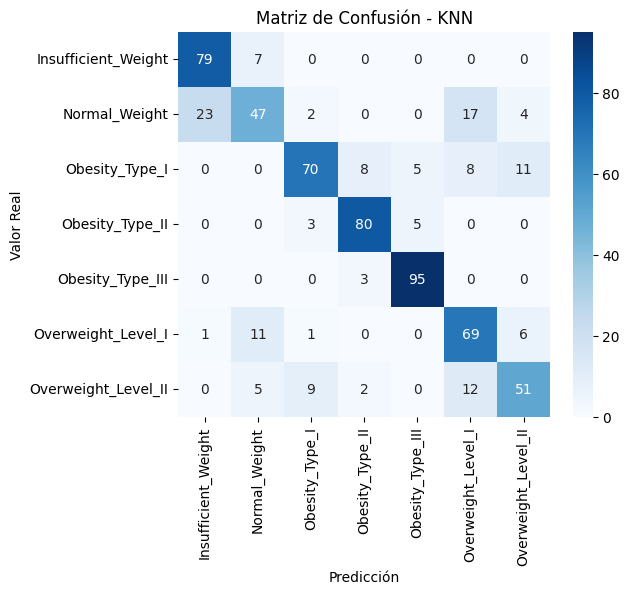


Modelo: Árbol de Decisión
[[81  5  0  0  0  0  0]
 [ 6 84  0  0  0  3  0]
 [ 0  0 97  3  0  0  2]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0  0  0  0  0 82  6]
 [ 0  0  0  0  0  3 76]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94        86
      Normal_Weight       0.94      0.90      0.92        93
     Obesity_Type_I       0.98      0.95      0.97       102
    Obesity_Type_II       0.97      0.99      0.98        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.93      0.93      0.93        88
Overweight_Level_II       0.90      0.96      0.93        79

           accuracy                           0.95       634
          macro avg       0.95      0.95      0.95       634
       weighted avg       0.95      0.95      0.95       634

Accuracy: 0.95


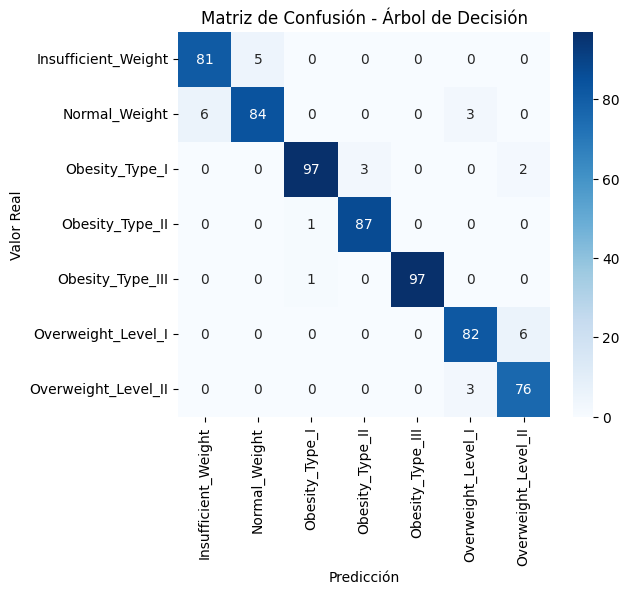

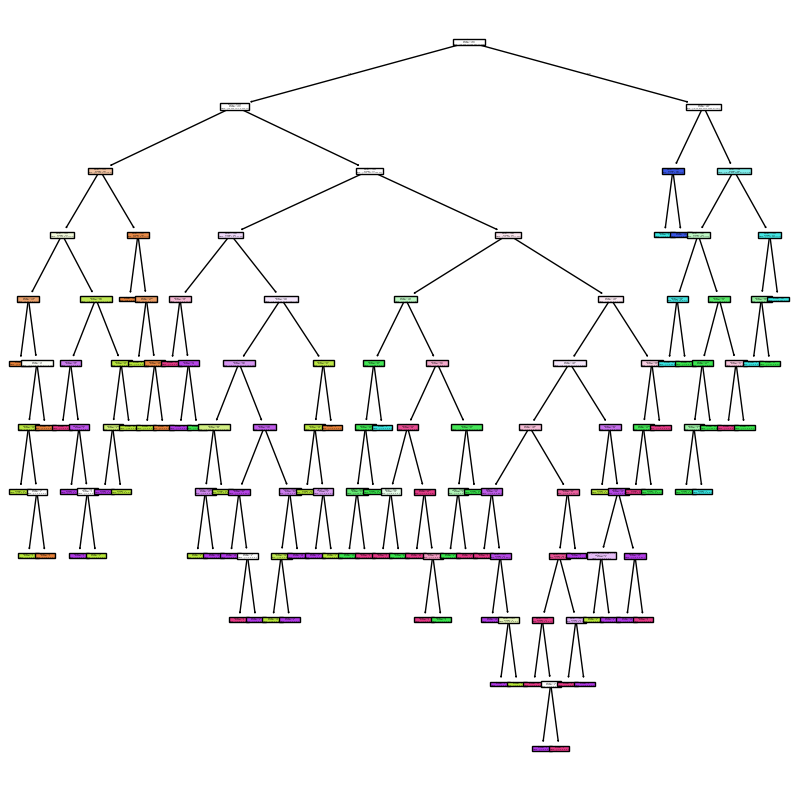


Modelo: Naive Bayes
[[73  3  6  0  0  4  0]
 [32 33  7  0  0 14  7]
 [ 0  2 64 27  0  5  4]
 [ 0  0  8 78  0  1  1]
 [ 0  0  1  0 97  0  0]
 [ 4 12 42  1  0 26  3]
 [ 1 12 41  7  0  3 15]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.66      0.85      0.74        86
      Normal_Weight       0.53      0.35      0.43        93
     Obesity_Type_I       0.38      0.63      0.47       102
    Obesity_Type_II       0.69      0.89      0.78        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.49      0.30      0.37        88
Overweight_Level_II       0.50      0.19      0.28        79

           accuracy                           0.61       634
          macro avg       0.61      0.60      0.58       634
       weighted avg       0.61      0.61      0.59       634

Accuracy: 0.61


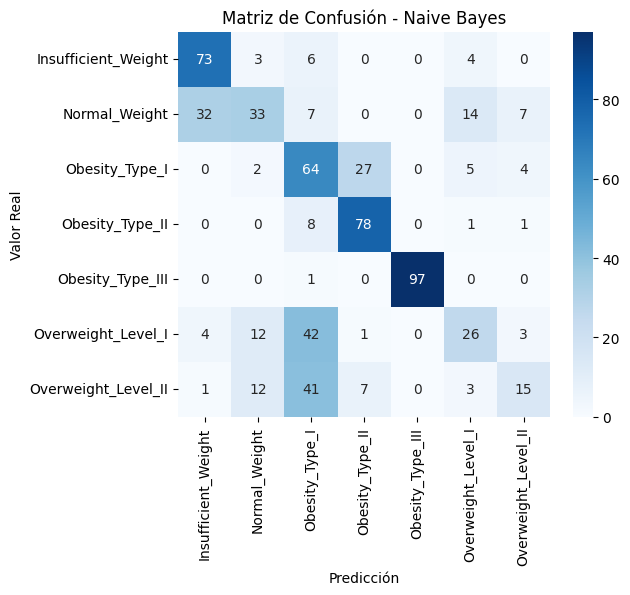

In [154]:
for name, model in models.items():
  model.fit(predict_variables_train, target_variable_train)  # Entrenar el modelo con el conjunto de entrenamiento
  target_variable_pred = model.predict(predict_variables_test)  # Hacer predicciones sobre el conjunto de prueba
  
  confusion_matrix_ = confusion_matrix(target_variable_test, target_variable_pred)
  
  print(f"\nModelo: {name}")
  print(confusion_matrix_)  # Matriz de confusión
  print(classification_report(target_variable_test, target_variable_pred))  # Reporte de clasificación
  print(f"Accuracy: {accuracy_score(target_variable_test, target_variable_pred):.2f}")  # Precisión
  
  # Graficar la matriz de confusión
  
  plt.figure(figsize=(6, 5))
  sns.heatmap(confusion_matrix_, annot=True, fmt="d", cmap="Blues", xticklabels=["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"], yticklabels=["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
  plt.title(f'Matriz de Confusión - {name}')
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

  if (name == "Árbol de Decisión"):
    plt.figure(figsize=(10, 10))
    tree.plot_tree(model, filled=True, feature_names=predict_variables.columns)
    plt.show()